In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
SIZE = 7
plt.rcParams['font.size'] = SIZE
plt.rcParams['font.family'] = 'Arial'

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title

%matplotlib inline


In [3]:
var_fitness_df =pd.read_csv('../data_tables/Fitness_files/ergosterol_pathway_fitness_separate_SC_replicates.tsv',sep = '\t')
annotations = pd.read_csv('../data_tables/erg_annos.tsv',sep='\t')
annotated_fitness = var_fitness_df.merge(annotations, 'inner', 'var_id')

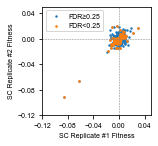

In [4]:

fig,ax = plt.subplots(figsize = (2,2))

h = annotated_fitness[(annotated_fitness['padj']<.25)&(annotated_fitness['condition'].isin(['SC','SC2']))].var_id.unique()
annotated_fitness.pivot(index = 'var_id',columns = 'condition',values = 'coef').plot.scatter('SC','SC2', ax = ax, c = u'#1f77b4', s =2)
annotated_fitness[annotated_fitness['var_id'].isin(h)].pivot(index = 'var_id',columns = 'condition',values = 'coef').plot.scatter('SC','SC2', ax = ax, c = u'#ff7f0e', s =2.5)

plt.legend([u'FDR\u22650.25', 'FDR<0.25'])
plt.axhline(0,color = 'grey', linewidth = 0.5, linestyle = 'dashed')
plt.axvline(0, color = 'grey', linewidth = 0.5, linestyle = 'dashed')
plt.xticks([-0.12,-0.08,-0.04,0.0,0.04])
plt.yticks([-0.12,-0.08,-0.04,0.0,0.04])
plt.ylim(-.12,.05)
plt.xlim(-.12,.05)
plt.ylabel('SC Replicate #2 Fitness')
plt.xlabel('SC Replicate #1 Fitness')
ax.set_box_aspect(1)
plt.savefig('../GxE_Figures/Figure_1/figure1i_sc_v_sc_replication.svg')

In [5]:
sc_v_sc_fitness= annotated_fitness[(annotated_fitness['padj']<=0.25)&(annotated_fitness['condition'].isin(['SC','SC2']))].pivot(index = 'var_id',columns = 'condition',values = 'coef')

In [6]:
sc_overlapping_hit_variants = sc_v_sc_fitness.dropna()

In [7]:
r, p = pearsonr(sc_overlapping_hit_variants['SC'],sc_overlapping_hit_variants['SC2'])

In [8]:
print('Pearson r = '+str(r))
print('p = '+str(p))

Pearson r = 0.9954314182842009
p = 3.9500487068726783e-72


In [9]:
r, p = spearmanr(sc_overlapping_hit_variants['SC'],sc_overlapping_hit_variants['SC2'])

In [10]:
r,p

(0.9024144869215291, 6.2226338715378434e-27)

In [11]:
sc_overlapping_hit_variants.index.nunique()

71